## 신경망과 딥러닝
# 신경망

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 신경망 계산방법

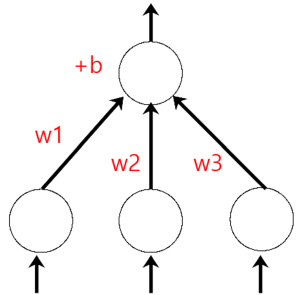

In [2]:
X = np.array([[1,0,1], [1,1,0], [1,-1,1], [1,1,1], [1,2,1]])
X

array([[ 1,  0,  1],
       [ 1,  1,  0],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [ 1,  2,  1]])

In [3]:
W = np.array([1,1,-1])
W

array([ 1,  1, -1])

In [4]:
### 행렬곱 적용
X@W

array([ 0,  2, -1,  1,  2])

In [5]:
X@(W.reshape(3,1))

array([[ 0],
       [ 2],
       [-1],
       [ 1],
       [ 2]])

In [6]:
### 절편값 적용
b= 0.1

X@W + b

array([ 0.1,  2.1, -0.9,  1.1,  2.1])

### 아이리스 선형회귀

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
X = iris.data[:, :3] # 훈련데이터
y = iris.data[:, 3]  # 목표값
X.shape, y.shape

((150, 3), (150,))

In [18]:
# 신경망을 훈련시키기 위해서는, 처음에 가중치 값이 있어야 한다 (가중치 초기화)
W = np.random.randn(3)
b = np.random.randn()
display(W, b)

array([-1.46027132, -0.81436812, -0.94922296])

0.39641324949615775

In [19]:
y_pred = X@W + b
y_pred

array([-11.23017106, -10.53093274, -10.3068298 , -10.26921045,
       -11.16558074, -12.27876659, -10.41859859, -11.09762941,
        -9.71936026, -10.70729184, -11.92604838, -10.90049744,
       -10.3849056 ,  -9.37000305, -12.46970045, -12.93418746,
       -11.89907741, -11.23017106, -12.63541118, -11.56940379,
       -11.87158253, -11.48796698, -10.20178303, -11.35206432,
       -11.18526433, -10.86680446, -11.19255171, -11.47112049,
       -11.29476138, -10.59159669, -10.65618701, -11.68173794,
       -11.95974136, -12.38433728, -10.70729184, -10.6499889 ,
       -11.71935729, -11.01955361,  -9.70587478, -11.24365654,
       -10.98922163,  -9.28184423,  -9.8687484 , -11.27398852,
       -11.94909298, -10.3849056 , -11.66432609, -10.25572496,
       -11.78002125, -10.9212703 , -16.89281191, -15.82680452,
       -16.85519255, -13.30501754, -15.7420067 , -14.47886735,
       -15.95205879, -11.84583549, -15.96947064, -13.0977611 ,
       -11.85595996, -14.64902835, -13.95371639, -15.33

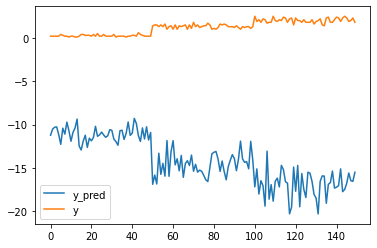

In [20]:
plt.plot(y_pred)
plt.plot(y)
plt.legend(['y_pred', 'y'])

### 오차값 계산
- 신경망은 예측값과 실제값의 차이(오차)를 줄이는 것이 목표이다.
- 이런 오차를 수치화 해야만 컴퓨터가 오차를 줄일 수 있다.
- MSE (Mean Squared Error) => 대표적인 오차값 계산방법

In [21]:
mse = (((y - y_pred)**2).sum())/150
#mse = ((y - y_pred)**2).mean()
mse

248.5273231915908

### 가중치 변경

In [22]:
W1 = W.copy()
W1[0] += 0.01
W1

array([-1.45027132, -0.81436812, -0.94922296])

In [23]:
y_pred = X@W1 + b
((y - y_pred)**2).mean()

246.6784133210366

In [24]:
W2 = W.copy()
W2[0] -= 0.01
W2

array([-1.47027132, -0.81436812, -0.94922296])

In [25]:
y_pred = X@W2 + b
((y - y_pred)**2).mean()

250.38319819547831

- W[1], W[2], b 에 대해서와 위와 같은 작업을 반복한다
- W 와 b 값을 조금 변경했을 때, 오차값이 늘어나는지 줄어드는 지를 확인한다
- 오차가 줄어드는 쪽으로 W 와 b 값을 바꾼다

### 중간층 추가시 계산
- 노드 2개인 중간층 추가

In [26]:
W1 = np.random.randn(3,2)
b1 = np.random.randn(2)
W2 = np.random.randn(2,1)
b2 = np.random.randn()
display(W1, b1, W2, b2)

array([[ 2.10118773, -0.54028143],
       [ 0.75880164,  1.48460968],
       [-1.30340367, -2.11358035]])

array([0.6935227 , 0.85173508])

array([[ 0.18936394],
       [-2.36821809]])

-1.6334886814965048

In [27]:
y1 = X@W1 + b1
y1

array([[ 12.24062071,   0.33342119],
       [ 11.44098235,  -0.30082736],
       [ 11.3028455 ,   0.3155089 ],
       [ 10.75616583,  -0.20164   ],
       [ 12.1063821 ,   0.5359103 ],
       [ 12.78347658,   0.13110653],
       [ 11.11414668,   0.45510094],
       [ 11.82428141,   0.02763033],
       [ 10.31450832,  -0.17914761],
       [ 11.38652214,  -0.36372443],
       [ 12.89239699,   0.25690067],
       [ 11.2737035 ,  -0.07567142],
       [ 11.23086358,  -0.24679922],
       [ 10.57129081,   0.6574156 ],
       [ 14.35153368,   1.1202451 ],
       [ 14.05391446,   1.13404301],
       [ 13.30483805,   0.97653867],
       [ 12.24062071,   0.33342119],
       [ 13.33795274,  -0.17943886],
       [ 12.33792084,   0.56744606],
       [ 12.40407577,  -0.61119831],
       [ 12.26204067,   0.41898509],
       [ 11.78726848,   1.59745501],
       [ 11.69783928,  -0.59757485],
       [ 10.88268239,  -0.70974552],
       [ 11.39042039,  -0.77757157],
       [ 11.69394104,  -0.1837277 ],
 

In [28]:
y1.shape

(150, 2)

In [31]:
y_pred = y1@W2 + b
y_pred

array([[ 1.92473129],
       [ 3.27534752],
       [ 1.78957071],
       [ 2.91077066],
       [ 1.41977296],
       [ 2.50665386],
       [ 1.42325355],
       [ 2.57007109],
       [ 2.77386979],
       [ 3.41398869],
       [ 2.22937151],
       [ 2.71045256],
       [ 3.10760818],
       [ 0.84133099],
       [ 0.46109146],
       [ 0.37205665],
       [ 0.60321323],
       [ 1.92473129],
       [ 3.34709087],
       [ 1.38893449],
       [ 4.19274877],
       [ 1.72615348],
       [-1.15462504],
       [ 4.02674973],
       [ 4.13803303],
       [ 4.39480718],
       [ 3.04593124],
       [ 2.56833079],
       [ 2.42968962],
       [ 3.21715118],
       [ 3.72210951],
       [ 3.24102846],
       [ 0.54501689],
       [ 0.23515578],
       [ 3.41398869],
       [ 1.81692858],
       [ 2.11982851],
       [ 1.25203362],
       [ 1.96079065],
       [ 2.73781043],
       [ 1.28113179],
       [ 4.48906288],
       [ 1.28635268],
       [ 2.70871226],
       [ 3.29237512],
       [ 3

In [32]:
y_pred.shape

(150, 1)

In [33]:
mse = ((y - y_pred.ravel())**2).mean() # ravel() 은 y_pred 를 1차원 데이터로 풀어준다
mse

306.8179021913887

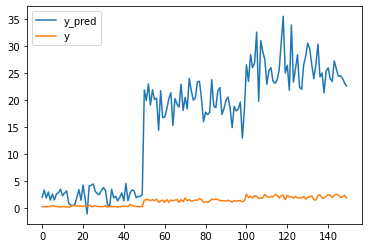

In [34]:
plt.plot(y_pred)
plt.plot(y)
plt.legend(['y_pred', 'y'])

### 활성화함수 추가
- 중간층을 추가한 경우 반드시 활성화함수를 적용해야 한다
- 대표적인 활성화함수는 sigmoid 와 relu 이다

In [35]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [36]:
sigmoid(np.array([[1,2],[3,4]]))

array([[0.73105858, 0.88079708],
       [0.95257413, 0.98201379]])

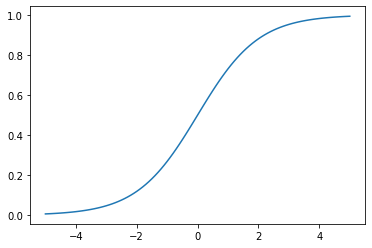

In [38]:
x = np.linspace(-5,5,101)
plt.plot(x, sigmoid(x))

In [42]:
y_pred = sigmoid(X@W1 + b1)@W2 + b2

In [43]:
y_pred.shape

(150, 1)

In [44]:
def relu(a):
    return np.maximum(a, 0)

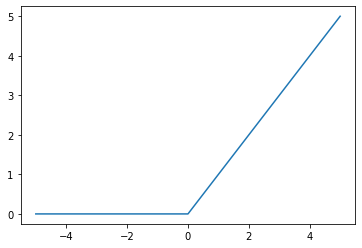

In [48]:
x = np.linspace(-5,5,101)
plt.plot(x, relu(x))

In [45]:
relu(np.random.randn(3,3))

array([[0.08092251, 1.89823246, 0.30732703],
       [0.        , 0.        , 1.21787011],
       [2.40461144, 0.        , 0.        ]])

In [46]:
y_pred = relu(X@W1 + b1)@W2 + b2

In [47]:
y_pred.shape

(150, 1)